## <strong> 1. 데이터에 대한 이해 </strong>

<h3> <strong> 1.1 훈련/테스트 데이터셋 </strong> </h3>

예측을 위해 학습에 사용하는 데이터를 **훈련 데이터셋(training dataset)**이라고 한다. <br>
학습 이후 모델이 얼마나 잘 작동하는지 판별하는 데이터셋을 **테스트 데이터셋(test dataset)**이라고 한다.


<h3> <strong> 1.2 훈련 데이터셋의 구성 </strong> </h3>

모델을 학습시키기 위한 데이터는 파이토치의 텐서의 형태를 가지고 있어야 한다.

In [ ]:
import torch
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

## <strong> 2. 가설 수립 </strong> 

머신 러닝에서 식을 세울때 이 식을 **가설(Hypothesis)**이라고 한다. <br> 머신 러닝에서 가설은 임의로 추측해서 세워보는 식일 수도 있고 알고 있는 식일 수도 있다. <br>

선형 회귀의 가설은 이미 널리 알려져 있다. <br>
선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일이다. <br>
이때 선형 회귀의 가설은 아래와 같다.

$y=Wx+b$

이때 W를 **가중치(Weight)**, b를 **편향(bias)**라고 한다.

## <strong> 3. 비용 함수에 대한 이해 </strong> 

다음 용어들은 모두 같은 용어로 생각하면 된다.

* **cost function / loss function / error function / objective function**

손실 함수란 예측값과 실제 정답간의 오차라고 생각할 수 있다. <br> 
즉, **손실 함수의 값을 작게 하는 것이 우리의 목표**로 선형 회귀의 경우 손실 함수의 값을 최소로 하는 W와 b를 탐색하게 된다. <br>
손실 함수의 예로는 평균 제곱 오차(Mean Squared Error, MSE) 등이 있다. <br>



## <strong> 4. 옵티마이저 - 경사 하강법 </strong> 

우리는 비용 함수의 값을 최소로 하는 W와 b를 찾아야 한다. <br>
이때 W와 b를 찾는 데 사용되는 것이 옵티마이저(Optimizer)로 최적화 알고리즘이라고도 불린다. <br>
이 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 **학습(training)**이라고 부른다. <br>
이때 경사 하강법(gradient descent)는 옵티마이저의 가장 기본적인 알고리즘이다.

좌표상에 임의의 4개의 점을 입력받고 해당 값들을 예측하기 위한 선형(직선) 방정식을 구한다고 하자. <br>
단, bias는 0라고 가정하자. <br>
이때 기울기가 지나치게 크거나 작으면 오차값이 매우 커질 것이다. <br>
즉, cost함수와 W의 관계를 그래프로 표현하면 아래의 그래프가 그려진다.

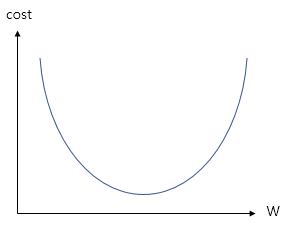

이때 우리의 목표는 cost가 가장 최소값을 가지게 하는 W를 찾는 것이다. <br>
즉, 맨 아래 볼록한 부분의 W값을 찾아야 한다. <br>
이를 위해 기계는 임의의 초기값 W를 지정하고, 맨 아래의 볼록한 부분을 향해 점차 W의 값을 수정해간다. <br>
이 과정을 수행해주는 것이 **경사 하강법(gradient descent)**이다. <br>

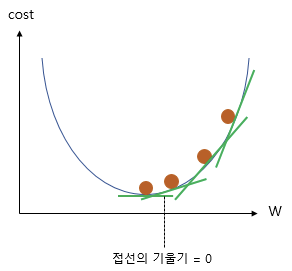

위 그림의 초록색 선은 W가 임의의 값을 가질 때 그래프 상의 접선의 기울기를 그려준 것이다. <br>
이때 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기는 점차 작아지고 맨 아래의 볼록한 부분의 점선의 기울기는 0이 된다.

즉, cost가 0이 되는 지점은 미분값이 0이 되는 지점이다. <br>
경사 하강법은 비용 함수를 미분하여 W에 대한 접선의 기울기를 구하고, 기울기가 낮은 방향으로 W의 값을 변경하는 작업을 반복하게 된다. <br>
이때 기울기는 다음과 같이 표현된다.

$기울기 = \frac{\partial cost(W)}{\partial W}$ 

임의의 변수에 대한 미분값의 부호에 동일한 방향으로 해당 변수를 이동하면 함수값은 증가한다. <br>
따라서 경사 하강법의 경우 기울기가 음수인 경우 양의 방향으로, 양수인 경우 음의 방향으로 이동시켜야 한다. <br>
따라서 다음과 같은 식을 작성할 수 있다.

$W = W-α\frac{∂}{∂W}cost(W)$

이때 $α$를 **학습률(learning rate)**라고 하며 W의 값을 변경할 때 얼마나 크게 변경할지를 결정한다. 
<br>
실제 선형 회귀에서는 W와 b를 동시에 경사 하강법을 수행하면서 최적의 W와 b값을 찾아낸다.

## <strong> 5. 파이토치로 선형 회귀 구현하기 </strong> 

<h3> <strong> 5.1 기본 셋팅 </strong> </h3>

아래는 기본 셋팅이며 이후에도 같은 결과가 나오도록 random seed를 지정해주었다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

<h3> <strong> 5.2 변수 선언 </strong> </h3>

훈련 데이터 x_train, y_train을 선언하자.

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

<h3> <strong> 5.3 가중치/편향 초기화 </strong> </h3>

선형 회귀란 학습 데이터와 잘 맞는 하나의 직선을 찾는 일이다. <br>
이때 가장 잘 맞는 직선을 정의하는 것이 W와 b이고 우리는 해당 값을 학습해야한다. <br>

먼저 가중치 W를 0으로 초기화하자.

In [ ]:
W = torch.zeros(1, requires_grad=True) # 0으로 초기화, 학습을 통해 변경되는 값임을 명시
print(W)

tensor([0.], requires_grad=True)


**requires_grad=True**를 인자로 넘기면 해당 변수는 학습을 통해 값이 변경되는 변수임을 의미한다. 

b도 동일하게 선언해보자.

In [ ]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


<h3> <strong> 5.4 가설 세우기 </strong> </h3>

파이토치 코드 상으로 직선의 방정식에 해당하는 가설을 선언한다.


In [ ]:
hypothesis = x_train*W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


<h3> <strong> 5.5 비용 함수 선언하기 </strong> </h3>

산형 회귀의 비용 함수인 평균 제곱 오차를 선언하자.

In [ ]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


<h3> <strong> 5.6 경사 하강법 구현하기 </strong> </h3>

아래의 **SGD**는 경사 하강법의 일종이며 lr은 학습률을 의미한다. <br>
학습 대상인 W와 b가 입력된다.

In [ ]:
optimizer = optim.SGD([W, b], lr=0.01)

**optimizer.zero_grad()**를 실행해서 미분을 통해 얻은 기울기를 0으로 초기화 해야한다. <br>
기울기를 초기화해야 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있다. <br>
그리고 **cost.backward() 함수**를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산된다. <br>
마지막으로 최적화 함수 optimizer의 **step()**을 호출하면 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률을 곱해 <br> 빼주면서 업데이트해준다.

In [ ]:
optimizer.zero_grad() # gradient를 0으로 초기화
cost.backward()       # 비용 함수를 미분하여 gradient 계산
optimizer.step()      # W와 b를 업데이트

<h3> <strong> 5.7 전체 코드 </strong> </h3>

In [ ]:
# 데이터 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 옵티마이저 설정
optimizer = optim.SGD([W, b], lr=0.01)

# 에포크 횟수 지정
nb_epochs = 1999
for epoch in range(nb_epochs):
  # H(x) 계산
  hypothesis = x_train*W + b

  # cost 계산
  cost = torch.mean((hypothesis-y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

결과적으로 훈련 과정에서 W와 b는 훈련 데이터에 맞는 직선을 표현하기 위한 적절한 값으로 변화한다. <br>
이때 **에포크(epoch)**란 전체 훈련 데이터가 학습에 한 법 사용된 주기를 말한다.

## <strong> 6. optimizer.zero_grad()가 필요한 이유 </strong> 

파이토치는 **미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있다.**

In [ ]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 5
for epoch in range(nb_epochs+1):
  z = 2*w

  z.backward()
  print("수식을 w로 미분한 값:", w.grad)

수식을 w로 미분한 값: tensor(2.)
수식을 w로 미분한 값: tensor(4.)
수식을 w로 미분한 값: tensor(6.)
수식을 w로 미분한 값: tensor(8.)
수식을 w로 미분한 값: tensor(10.)
수식을 w로 미분한 값: tensor(12.)


위처럼 미분값 2가 누적되므로 미분값을 계속 0으로 초기화해야 한다.

출처: https://wikidocs.net/53560